<a href="https://colab.research.google.com/github/AI-ClassWork/Tensorflow_Fundamentals/blob/main/MyTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quickly try to visualize the data in the GTSRB - German Traffic Sign Recognition Benchmark dataset

In [51]:
#Get Helper Functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-03-23 19:22:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-03-23 19:22:55 (88.8 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [52]:
#Import series of helper functions for our notebook
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,compare_historys,walk_through_dir

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
!unzip drive/MyDrive/archive.zip -d "/content/archive"

Streaming output truncated to the last 5000 lines.
  inflating: /content/archive/train/5/00005_00053_00010.png  
  inflating: /content/archive/train/5/00005_00053_00011.png  
  inflating: /content/archive/train/5/00005_00053_00012.png  
  inflating: /content/archive/train/5/00005_00053_00013.png  
  inflating: /content/archive/train/5/00005_00053_00014.png  
  inflating: /content/archive/train/5/00005_00053_00015.png  
  inflating: /content/archive/train/5/00005_00053_00016.png  
  inflating: /content/archive/train/5/00005_00053_00017.png  
  inflating: /content/archive/train/5/00005_00053_00018.png  
  inflating: /content/archive/train/5/00005_00053_00019.png  
  inflating: /content/archive/train/5/00005_00053_00020.png  
  inflating: /content/archive/train/5/00005_00053_00021.png  
  inflating: /content/archive/train/5/00005_00053_00022.png  
  inflating: /content/archive/train/5/00005_00053_00023.png  
  inflating: /content/archive/train/5/00005_00053_00024.png  
  inflating: /conte

In [55]:
walk_through_dir("/content/archive")

There are 6 directories and 4 images in '/content/archive'.
There are 43 directories and 0 images in '/content/archive/train'.
There are 0 directories and 1440 images in '/content/archive/train/7'.
There are 0 directories and 240 images in '/content/archive/train/27'.
There are 0 directories and 420 images in '/content/archive/train/34'.
There are 0 directories and 1860 images in '/content/archive/train/5'.
There are 0 directories and 630 images in '/content/archive/train/15'.
There are 0 directories and 210 images in '/content/archive/train/0'.
There are 0 directories and 510 images in '/content/archive/train/23'.
There are 0 directories and 420 images in '/content/archive/train/16'.
There are 0 directories and 600 images in '/content/archive/train/26'.
There are 0 directories and 240 images in '/content/archive/train/41'.
There are 0 directories and 780 images in '/content/archive/train/14'.
There are 0 directories and 1200 images in '/content/archive/train/35'.
There are 0 directori

In [113]:
data_dir = '/content/archive'


In [57]:
import os
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [58]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path("/content/archive/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of classnames from the names of the sub directories
print(class_names)

['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '5' '6' '7' '8' '9']


In [59]:
type(class_names)

numpy.ndarray

In [60]:
from array import *
def array_list(array_num):
    num_list = array_num.tolist() # list
    return num_list
  


In [61]:
class_names_list= array_list(class_names)
class_names_list

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '5',
 '6',
 '7',
 '8',
 '9']

In [62]:
type(class_names_list)

list

In [63]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }
        

In [64]:
class_names

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '4', '40', '41', '42', '5', '6', '7', '8', '9'], dtype='<U2')

In [65]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #Setup the target directory (we'll view images from here)
  target_folder=target_dir+target_class

  #Get the random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  
  #Read the image and plot using matplitlib
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")# show the  shape of the image

  return img



['00016_00001_00002.png']
Image shape: (43, 38, 3)


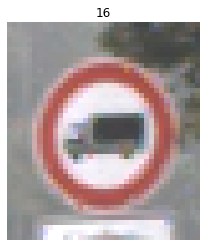

In [66]:
#View the random image from the training dataset
img=view_random_image(target_dir="archive/train/",
                      target_class="16")

In [67]:
import tensorflow as tf

In [68]:
# View the image shape
img.shape #Returns width, height,color channels

(43, 38, 3)

In [69]:
tf.constant(img)

<tf.Tensor: shape=(43, 38, 3), dtype=float32, numpy=
array([[[0.5921569 , 0.60784316, 0.6156863 ],
        [0.58431375, 0.5921569 , 0.5921569 ],
        [0.60784316, 0.6117647 , 0.61960787],
        ...,
        [0.3647059 , 0.36078432, 0.35686275],
        [0.3882353 , 0.3529412 , 0.33333334],
        [0.35686275, 0.34509805, 0.3137255 ]],

       [[0.627451  , 0.6313726 , 0.6313726 ],
        [0.60784316, 0.60784316, 0.6039216 ],
        [0.6156863 , 0.6156863 , 0.6156863 ],
        ...,
        [0.34509805, 0.3372549 , 0.32156864],
        [0.37254903, 0.35686275, 0.3372549 ],
        [0.30980393, 0.30980393, 0.28235295]],

       [[0.62352943, 0.61960787, 0.61960787],
        [0.627451  , 0.62352943, 0.6156863 ],
        [0.62352943, 0.6156863 , 0.6156863 ],
        ...,
        [0.32941177, 0.31764707, 0.3019608 ],
        [0.29411766, 0.29803923, 0.28627452],
        [0.25882354, 0.2784314 , 0.27058825]],

       ...,

       [[0.49019608, 0.52156866, 0.5176471 ],
        [0.5333

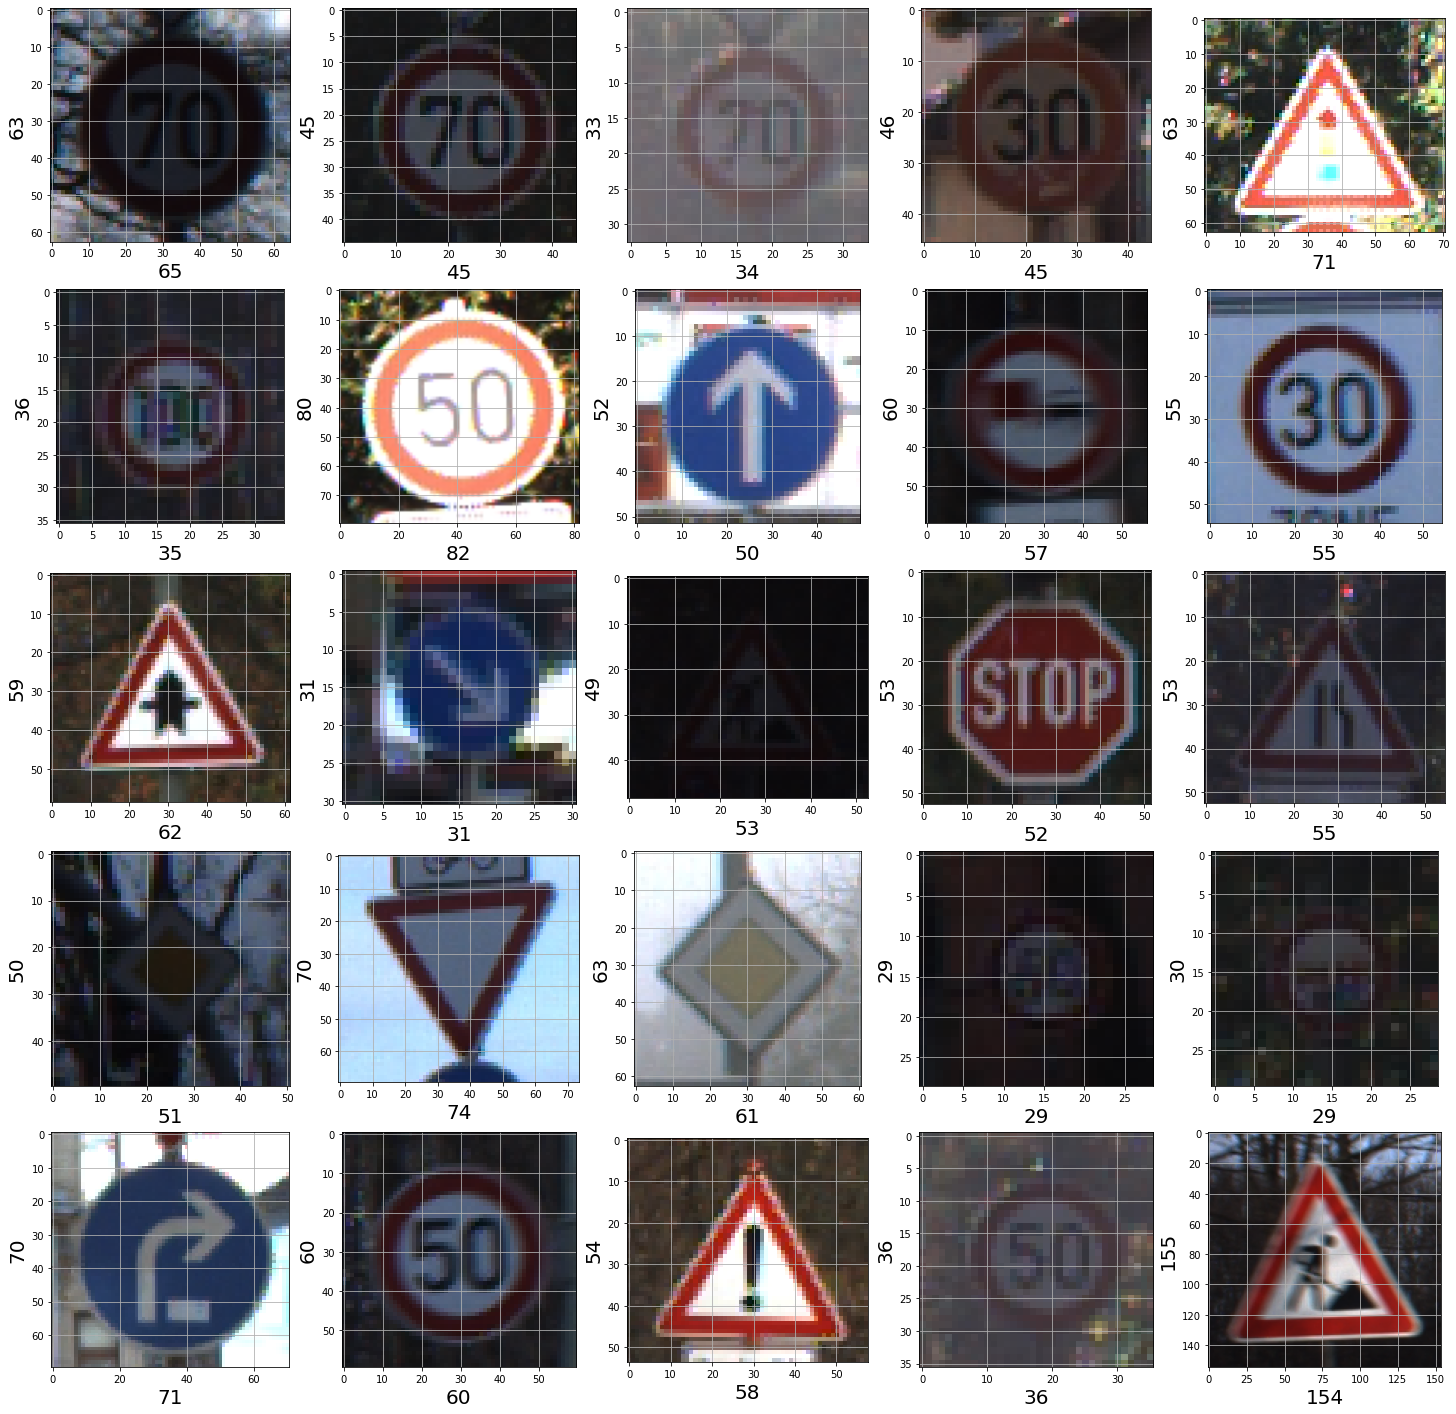

In [70]:
# Plot multiple random images of the road signs
# Visualizing 25 random images from train data
import random
from matplotlib.image import imread
import pandas as pd

data_dir = '/content/archive'
train = pd.read_csv(data_dir + '/Train.csv')
imgs = train["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

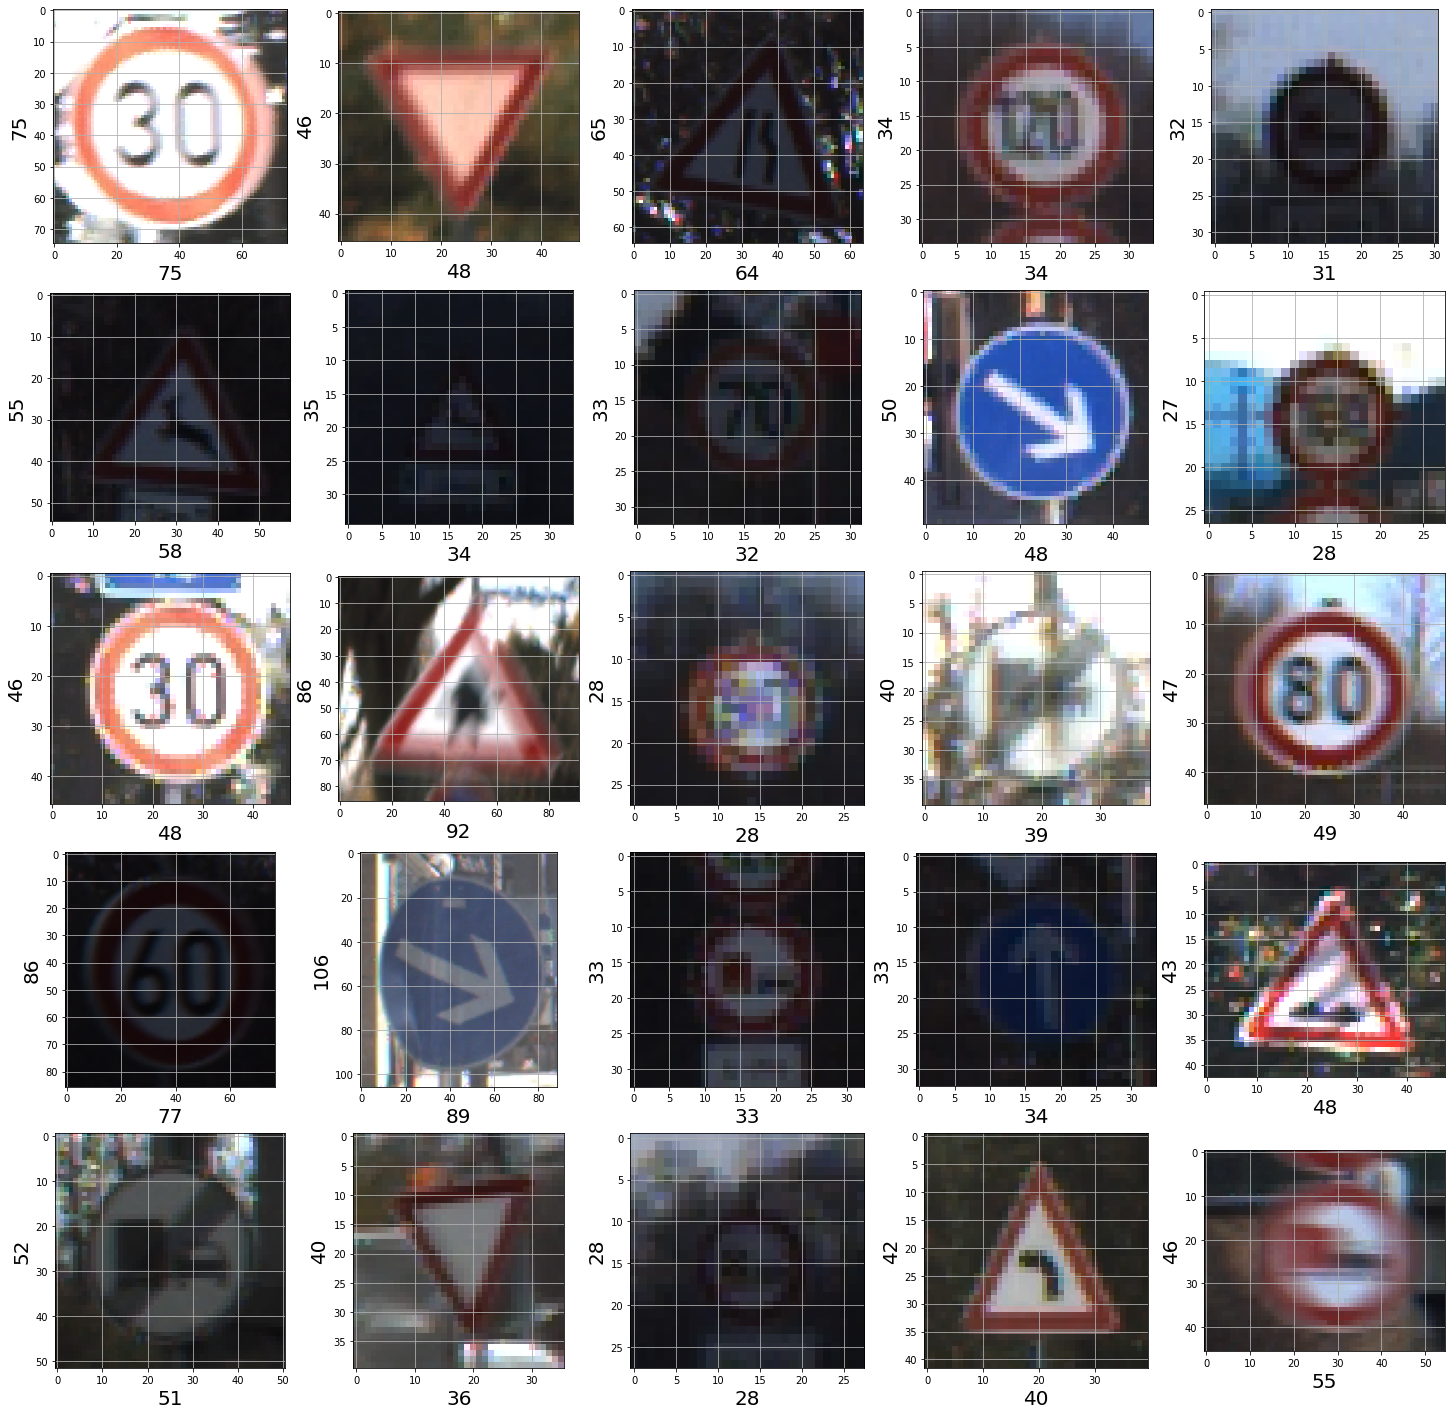

In [71]:
# Plot multiple random images of the road signs
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

data_dir = '/content/archive'
test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

#Attempting to get the test data in the same format as the train data (images in their respective directories

In [72]:
import json
from tqdm.notebook import tqdm

In [74]:
# Get labels
def get_labels(label_path):
    """
    Accepts a label path (in the form of a JSON) and returns the file
    as a Python object.
    """
    with open(label_path) as f:
        return json.load(f)


In [78]:
test_labels = get_labels("/content/archive/test.json")

In [109]:
import shutil
import os

def copy_images(parent_folder, new_subset, dataset, target_labels):
    """
    Copies `labels[target_labels]` images from `parent_folder` to
    `new_subset` (named after `dataset`) folder.
    
    E.g. move bump images to /content/archive/test/ & 
    data/steak_subset/test/
    
    Parameters
    --------
    parent_folder (str) - original folder path with all data
    new_subset (str) - name of parent folder to copy to
    dataset (str) - which dataset? (train or test)
    labels (list) - list of training or test labels
    target_labels (list) - list of target labels to copy e.g. ["11", "12"]
    """
    # Get the appropriate labels
    labels =  get_labels("/content/archive/test.json")
    
    # Loop through target labels
    for i in target_labels:
        # Make target directory
        os.makedirs(parent_folder + "/" + new_subset + "/" + "mytest" + "/" +i, 
                    exist_ok=True)
        
        # Go through labels and get appropriate classes
        images_moved = [] # Keep track of images moved
        print(labels[i])
        
        for j in labels[i]:
            # Create original image path and new path
            
            og_path = parent_folder + "/archive/test/" + j 
            new=parent_folder + "/archive/mytest/" + i + "/"
            new_path = parent_folder + "/archive/mytest/" + i + "/" + j
            print(og_path)
            print(new_path)

            # Copy images from old path to new path
            shutil.copy(og_path, new_path)
            images_moved.append(new_path)
        print(f"Copied {len(images_moved)} images from {dataset} dataset {i} class...")

In [110]:
parent_folder = "/content"
target_labels = class_names_list
new_subset = "archive"
datasets = ["Test"]

copy_images(parent_folder=parent_folder,
new_subset=new_subset,
dataset=datasets,
#labels=labels,
target_labels=target_labels)


Streaming output truncated to the last 5000 lines.
/content/archive/mytest/4/10617.png
/content/archive/test/10644.png
/content/archive/mytest/4/10644.png
/content/archive/test/10679.png
/content/archive/mytest/4/10679.png
/content/archive/test/10705.png
/content/archive/mytest/4/10705.png
/content/archive/test/10708.png
/content/archive/mytest/4/10708.png
/content/archive/test/10711.png
/content/archive/mytest/4/10711.png
/content/archive/test/10722.png
/content/archive/mytest/4/10722.png
/content/archive/test/10752.png
/content/archive/mytest/4/10752.png
/content/archive/test/10762.png
/content/archive/mytest/4/10762.png
/content/archive/test/10813.png
/content/archive/mytest/4/10813.png
/content/archive/test/10829.png
/content/archive/mytest/4/10829.png
/content/archive/test/10880.png
/content/archive/mytest/4/10880.png
/content/archive/test/10890.png
/content/archive/mytest/4/10890.png
/content/archive/test/10895.png
/content/archive/mytest/4/10895.png
/content/archive/test/10900.p

#Creating data Inputs

In [114]:
train_path = '/content/archive/train'
test_path = '/content/archive/mytest'

In [112]:
# Create data inputs
import tensorflow as tf
IMG_SIZE = (50,50) # define image size
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_path,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32) # batch_size is 32 by default, this is generally a good number
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_path,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=32)

Found 39209 files belonging to 43 classes.
Found 12181 files belonging to 43 classes.
